## Predicting and Understanding Viewer Engagement with Educational Videos

This assignment involves predicting the engagement level of educational videos using supervised machine learning. Features extracted from transcripts, audio tracks, and hosting sites are utilized to determine engagement. Understanding which features contribute to viewer engagement in educational content is crucial for various sectors, making this problem both practical and representative of machine learning applications.


**Data Fields**

title_word_count - the number of words in the title of the video.

document_entropy - a score indicating how varied the topics are covered in the video, based on the transcript. Videos with smaller entropy scores will tend to be more cohesive and more focused on a single topic.

freshness - The number of days elapsed between 01/01/1970 and the lecture published date. Videos that are more recent will have higher freshness values.

easiness - A text difficulty measure applied to the transcript. A lower score indicates more complex language used by the presenter.

fraction_stopword_presence - A stopword is a very common word like 'the' or 'and'. This feature computes the fraction of all words that are stopwords in the video lecture transcript.

speaker_speed - The average speaking rate in words per minute of the presenter in the video.

silent_period_rate - The fraction of time in the lecture video that is silence (no speaking).
train.csv only:

engagement - Target label for training. True if learners watched a substantial portion of the video, or False otherwise (true if the median percentage of the video watched across all viewers was at least 30%, and false otherwise).

#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

#### Loading the Model Training Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,False
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,False
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,False


In [3]:
X = df[['id', 'title_word_count', 'document_entropy', 'freshness', 'easiness', 'fraction_stopword_presence',
        'normalization_rate', 'speaker_speed', 'silent_period_rate']]
y = df['engagement']

#### Building Random Forest Classifier Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth = 10)
y_score = model.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, t = roc_curve(y_test, y_score[:, 1])

#### Assesing ROC Curve and AUC

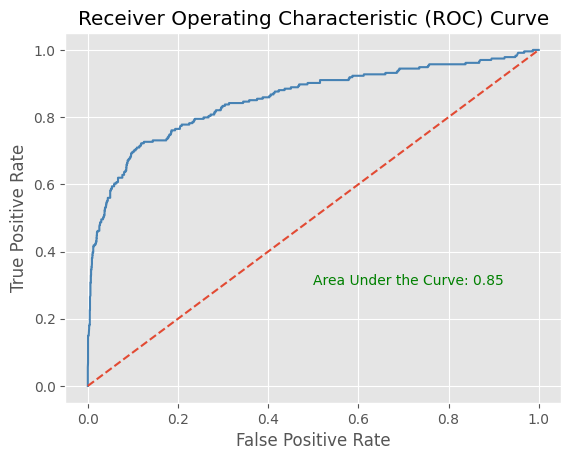

In [5]:
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color = 'steelblue')
plt.plot([0, 1], linestyle = '--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.3, 'Area Under the Curve: {:.2f}'.format(auc_score), color = 'green')
plt.show()

#### Loading the Model Testing Dataset

In [6]:
test_df = pd.read_csv('test.csv')
test_df = test_df[['id', 'title_word_count', 'document_entropy', 'freshness', 'easiness', 'fraction_stopword_presence',
                   'normalization_rate', 'speaker_speed', 'silent_period_rate']]
test_df.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
0,9240,6,8.548351,14140,89.827395,0.640810,0.017945,2.262723,0.000000
1,9241,8,7.730110,14600,82.446667,0.606738,0.027708,2.690351,0.000000
2,9242,3,8.200887,16980,88.821542,0.621089,0.009857,3.116071,0.000000
3,9243,5,6.377299,16260,86.874660,0.600000,0.004348,2.837500,0.017994
4,9244,18,7.756530,14030,88.872277,0.616105,0.033240,1.354839,0.000000


#### Prediction Scores

In [8]:
pred_scores = model.predict_proba(test_df)[:, 1]
test_scores = pd.Series(pred_scores, index = test_df['id'])

test_scores

id
9240     0.016739
9241     0.039588
9242     0.158212
9243     0.583120
9244     0.012369
           ...   
11544    0.025847
11545    0.001591
11546    0.006038
11547    0.760454
11548    0.025885
Length: 2309, dtype: float64

#### Accuracy Scores

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
model = RandomForestClassifier(n_estimators = 10, random_state = 42, max_depth = 10).fit(X_train, y_train)

print('Training Accuracy of Model: {:.2f}%'.format(model.score(X_train, y_train)*100))
print('Testing Accuracy of Model: {:.2f}%'.format(model.score(X_test, y_test)*100))

Training Accuracy of Model: 96.90%
Testing Accuracy of Model: 92.55%


#### Sample Prediction

In [16]:
engagement = model.predict([[34, 7, 7.11583, 19680, 91.915968, 0.6185, 0.010720, 1.538095, 0.0]])

if engagement[0] == True:
    print('The learner has watched a substantial portion of the video and it was engaging enough.')
else:
    print('The video was not engaging enough for the learner and has not watched much of it.')

The learner has watched a substantial portion of the video and it was engaging enough.
